# Outlier explainer demo

This notebook demonstrates the usage of the outlier explainer.\
Note that it is recommended to use our other package, pd-explain, for better ease of use and more features.

## Imports and loading data

In [1]:
import pandas as pd
from external_explainers import OutlierExplainer

In [2]:
spotify_data = pd.read_csv('https://raw.githubusercontent.com/analysis-bots/pd-explain/refs/heads/main/Examples/Datasets/spotify_all.csv')
spotify_data.head()

,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,...,name,popularity,speechiness,tempo,valence,year,decade,popularity_score,main_artist,duration_minutes
0,0.991000,['Mamie Smith'],0.598,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,...,Keep A Song In Your Soul,12,0.0936,149.976,0.6340,1920,1920,10,Mamie Smith,2.805550
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,...,I Put A Spell On You,7,0.0534,86.889,0.9500,1920,1920,0,Screamin' Jay Hawkins,2.503333
2,0.993000,['Mamie Smith'],0.647,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,...,Golfing Papa,4,0.1740,97.600,0.6890,1920,1920,0,Mamie Smith,2.730450
3,0.000173,['Oscar Velazquez'],0.730,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,...,True House Music - Xavier Santos & Carlos Gomi...,17,0.0425,127.997,0.0422,1920,1920,10,Oscar Velazquez,7.034783
4,0.295000,['Mixe'],0.704,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,...,Xuniverxe,2,0.0768,122.076,0.2990,1920,1920,0,Mixe,2.753733


## Outlier detection

The outlier explainer is meant for usage on series that are a result of aggregation operations.\
First, we perform a groupby and aggregation on the data.

In [3]:
new_songs_df = spotify_data[spotify_data['year'] >= 1990]
gb_decade = new_songs_df.groupby('decade')['popularity'].mean()
gb_decade

decade
1990    43.120769
2000    43.167320
2010    29.579203
2020    19.171014
Name: popularity, dtype: float64

Now we can the outlier to explain suspected outliers.

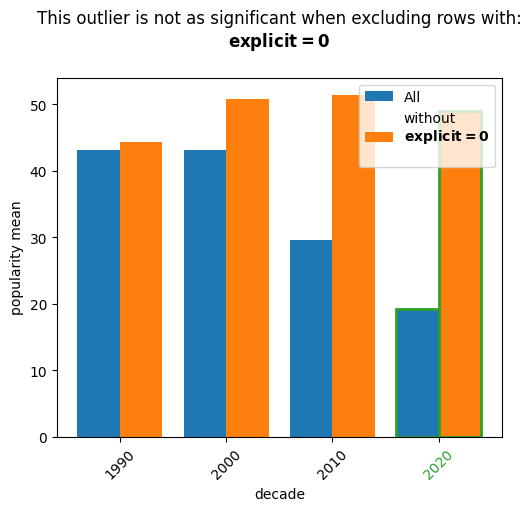

In [5]:
outlier_explainer = OutlierExplainer()
outlier_explainer.explain(df_agg=gb_decade, df_in=new_songs_df, g_att='decade', g_agg='popularity', agg_method='mean', target=2020, dir=-1)

Once again, we recommend doing this via pd-explain for a more streamlined experience, where most of these parameters are automatically inferred via the user's previous actions.